# **1. Importing Libraries**

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

# **2.Loading Data**

In [ ]:
local_path = '../data/'
kaggle_path = '/kaggle/input/fraud-detection/'


def identify_data_path():
    if os.path.exists(local_path):
        return local_path
    elif os.path.exists(kaggle_path):
        return kaggle_path

In [ ]:


fraud_train = pd.read_csv('fraudTrain.csv')
fraud_test = pd.read_csv('fraudTest.csv')

# **a.Checking if the both datasets have same columns**

In [ ]:
def match_dataframe_columns(df_train, df_test):
    try:
        return(all(df_train.columns == df_test.columns))
    except:
        return(False)

In [ ]:
match_dataframe_columns(fraud_train, fraud_test)

True

# **b.Appending train and test dataset**

In [ ]:
fraud_data = pd.concat([fraud_train, fraud_test], ignore_index=False)

In [ ]:
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
fraud_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
7793,7793,2020-06-23 13:01:43,377113842678100,fraud_Fritsch and Sons,health_fitness,152.25,Billy,Gallagher,M,673 Delgado Burg,Greenwich,NJ,8323.0,39.4055,-75.3209,804.0,Insurance risk surveyor,1965-03-25,f7acd865db256104d0ce1b8a1ffbae05,1.371993e+09,39.935513,-75.179333,0.0
7794,7794,2020-06-23 13:02:09,6538891242532018,"fraud_Torp, Muller and Borer",health_fitness,32.66,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,Walnut Ridge,AR,72476.0,36.0244,-90.9288,7155.0,"Engineer, control and instrumentation",1977-03-23,6070406dc6dce186b67636e216419ead,1.371993e+09,35.702523,-90.870504,0.0
7795,7795,2020-06-23 13:02:35,4658117080136,fraud_Haley Group,misc_pos,8.50,Dwayne,Martinez,M,490 Baldwin Alley Apt. 468,Crownpoint,NM,87313.0,35.7206,-108.0271,5662.0,IT consultant,1989-04-08,f36fdd434c182ce310169da03766f859,1.371993e+09,34.883752,-108.588882,0.0
7796,7796,2020-06-23 13:03:43,2720830304681674,fraud_Kozey-Kuhlman,personal_care,20.09,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040.0,36.5220,-87.3490,151785.0,Pathologist,1974-03-28,f7a3f70dbbcca903324b9c22d98ffd47,1.371993e+09,36.373711,-87.343330,0.0
7797,7797,2020-06-23 13:03:50,4992346398065154184,fraud_Yost-Rogahn,personal_care,74.00,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,IL,61335.0,41.1730,-89.2187,532.0,Audiological sci,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 7797
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15613 non-null  int64  
 1   trans_date_trans_time  15613 non-null  object 
 2   cc_num                 15613 non-null  int64  
 3   merchant               15613 non-null  object 
 4   category               15613 non-null  object 
 5   amt                    15613 non-null  float64
 6   first                  15613 non-null  object 
 7   last                   15613 non-null  object 
 8   gender                 15612 non-null  object 
 9   street                 15612 non-null  object 
 10  city                   15612 non-null  object 
 11  state                  15612 non-null  object 
 12  zip                    15612 non-null  float64
 13  lat                    15612 non-null  float64
 14  long                   15612 non-null  float64
 15  cit

# **3.Data Clean Up**#

In [ ]:
fraud_data['name'] = fraud_data['first'] + ' ' + fraud_data['last']

transaction_date = pd.to_datetime(fraud_data['trans_date_trans_time'])
birth_date = pd.to_datetime(fraud_data['dob'])
year_timedelta = np.timedelta64(1, 'Y')
fraud_data['age_years'] = (transaction_date - birth_date) / year_timedelta

# **5. Exploratory Data Analysis**

## **A) Data Quality**

### **a. Handling Duplicates**

In [ ]:
duplicate_rows_data = fraud_data[fraud_data.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_data.shape)

Number of duplicated rows:  (0, 25)


### **b. Uniqueness**

In [ ]:
for column in fraud_data.columns:
    num_distinct_values = len(fraud_data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 7815 distinct values
trans_date_trans_time: 15361 distinct values
cc_num: 908 distinct values
merchant: 693 distinct values
category: 14 distinct values
amt: 8914 distinct values
first: 337 distinct values
last: 466 distinct values
gender: 3 distinct values
street: 909 distinct values
city: 836 distinct values
state: 51 distinct values
zip: 898 distinct values
lat: 896 distinct values
long: 897 distinct values
city_pop: 822 distinct values
job: 477 distinct values
dob: 895 distinct values
trans_num: 15612 distinct values
unix_time: 15360 distinct values
merch_lat: 15604 distinct values
merch_long: 15608 distinct values
is_fraud: 3 distinct values
name: 902 distinct values
age_years: 15612 distinct values


### **c. Missing values**

In [ ]:
print(fraud_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      2
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
name                     0
age_years                2
dtype: int64


### **d. Describe data**

In [ ]:
fraud_data.describe().style.format('{:.2f}')

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age_years
count,15613.00,15613.00,15613.00,15612.00,15612.00,15612.00,15612.00,15611.00,15611.00,15611.00,15611.00,15611.00
mean,3902.75,406159965730751552.00,68.66,48974.19,38.54,-90.33,93288.24,1348717896.04,38.53,-90.33,0.00,46.16
std,2253.62,1294139693034315520.00,118.84,26980.06,5.14,14.07,314346.09,23160755.77,5.18,14.09,0.07,17.44
min,0.00,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.16,-166.55,0.00,13.92
25%,1951.00,180036456789979.00,9.61,26041.00,34.70,-96.81,759.00,1325582779.50,34.78,-96.94,0.00,32.76
50%,3903.00,3518669219150142.00,47.50,48202.00,39.36,-87.46,2501.00,1325814784.00,39.36,-87.43,0.00,44.17
75%,5854.00,4651007077623147.00,81.94,72047.00,41.94,-80.16,20478.00,1371907534.00,41.96,-80.22,0.00,56.96
max,7814.00,4992346398065154048.00,3204.98,99783.00,65.69,-67.95,2906700.00,1371992623.00,66.65,-66.97,1.00,95.65


# **C) Univariate Analysis**

### **a. Bar plot for merchant**

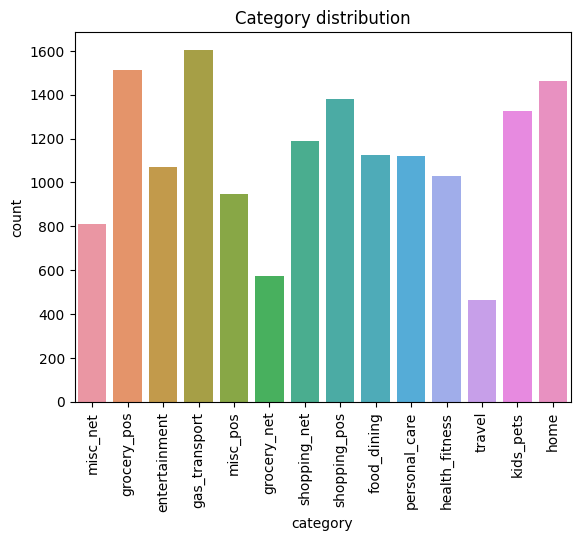

In [ ]:
sns.countplot(x='category', data=fraud_data)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

### **b. Histogram for amt**

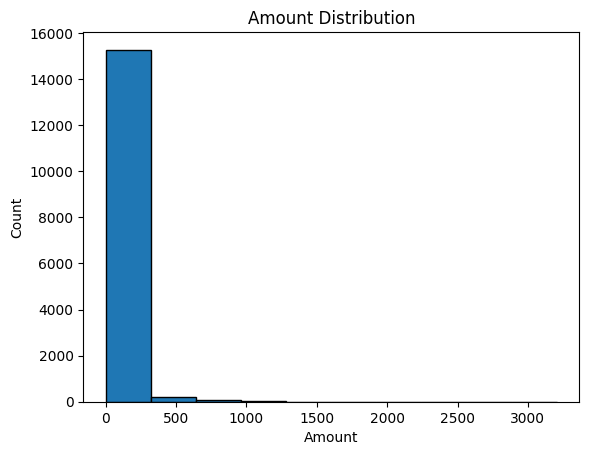

In [ ]:
plt.hist(fraud_data['amt'], edgecolor='black')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

### **c. Bar plot for gender**

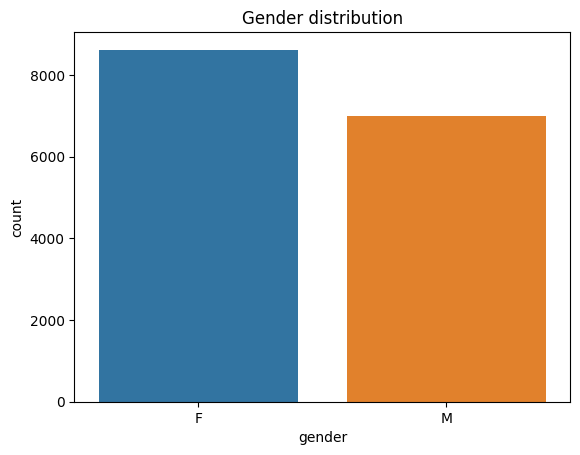

In [ ]:
sns.countplot(x='gender', data=fraud_data)
plt.title('Gender distribution')
plt.show()

### **d. Bar plot for state**

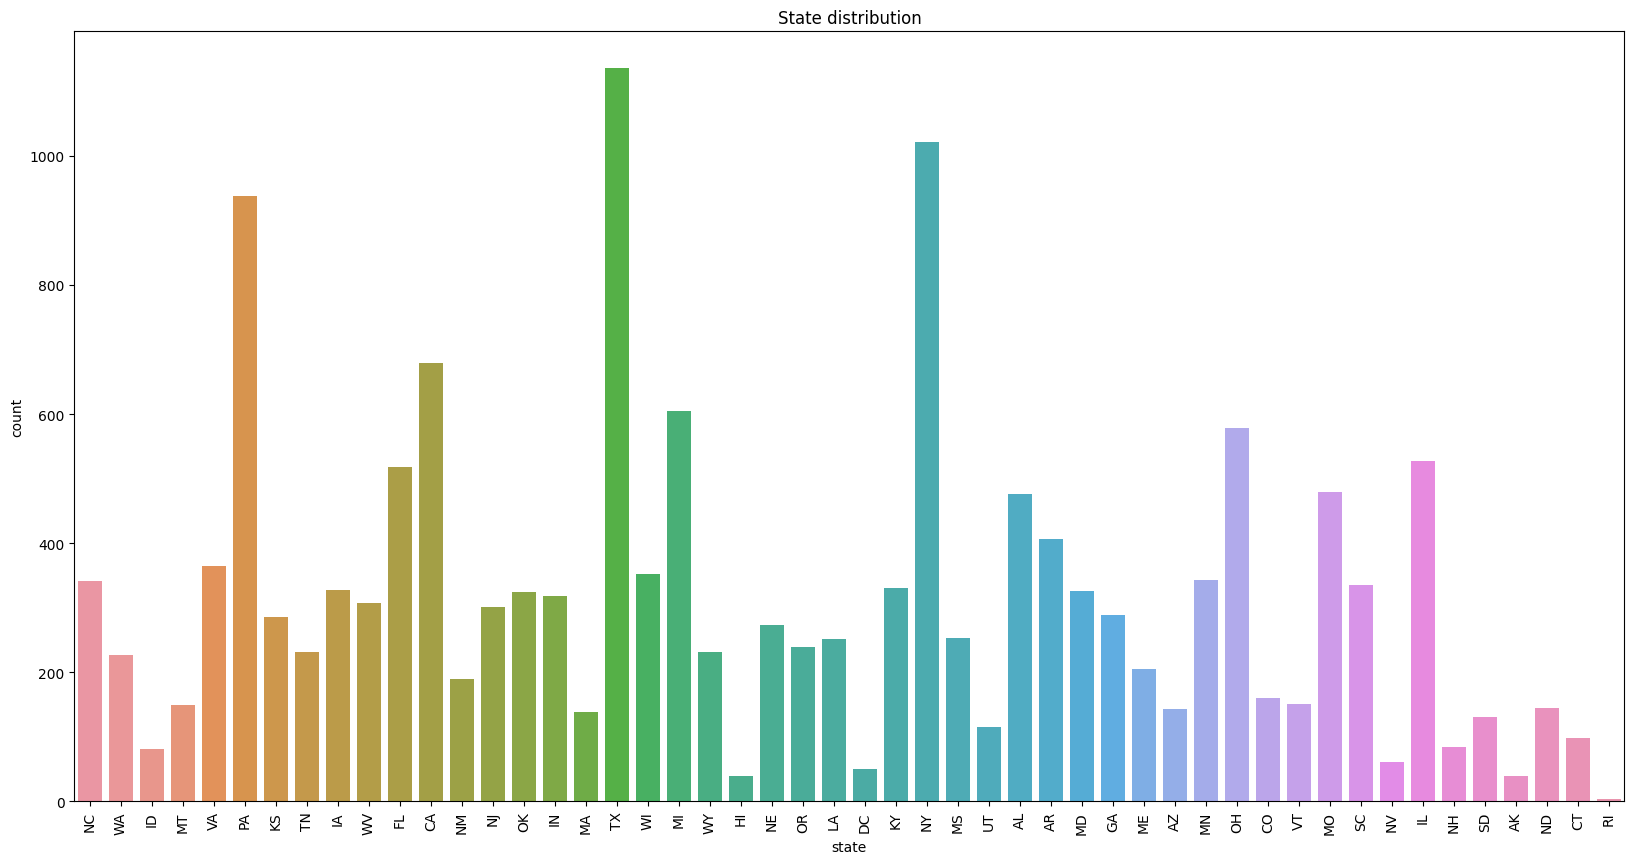

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='state', data=fraud_data)
plt.title('State distribution')
plt.xticks(rotation=90)
plt.show()

### **e. Histogram for age**

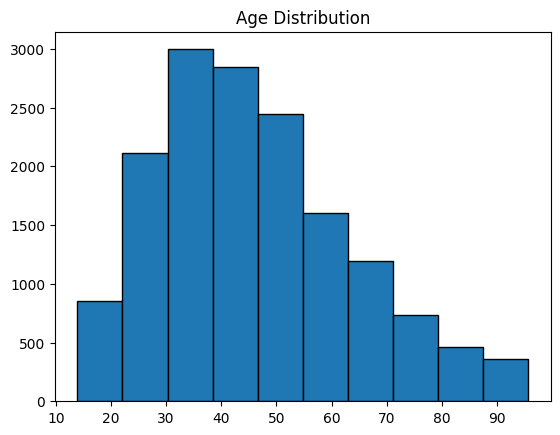

In [ ]:
plt.hist(fraud_data['age_years'], edgecolor='black')
plt.title('Age Distribution')
plt.show()

### **f. Bar plot for is_fraud**

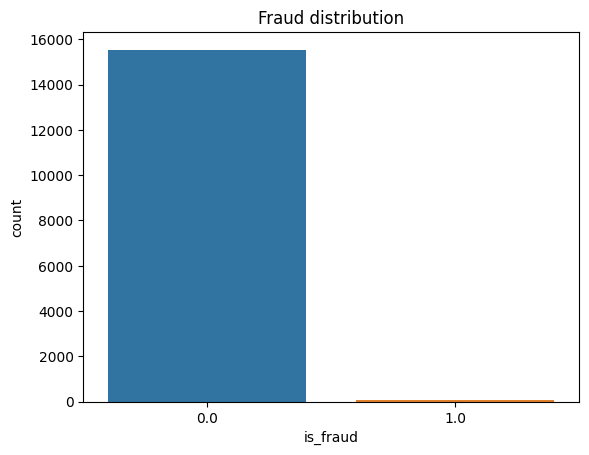

In [ ]:
sns.countplot(x='is_fraud', data=fraud_data)
plt.title('Fraud distribution')
plt.show()

# **D) Bivariate Analysis**

### **a. Boxplot Amount vs Fraud Classification**

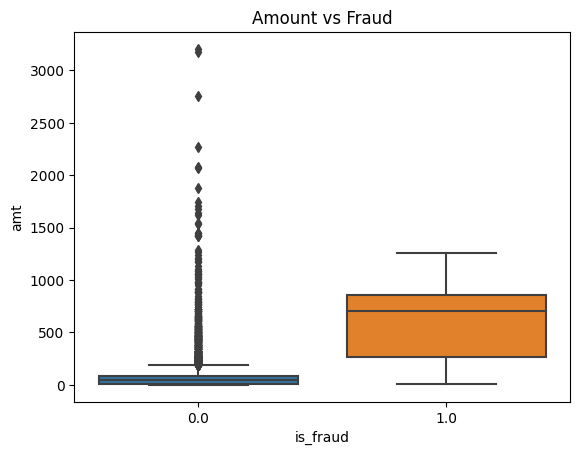

In [ ]:
sns.boxplot(x='is_fraud', y='amt', data=fraud_data)
plt.title("Amount vs Fraud")
plt.show()

### **b. Countplot for gender vs fraud**

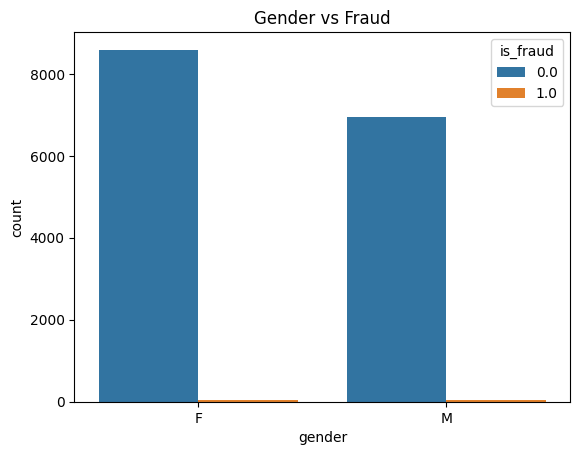

In [ ]:
sns.countplot(x='gender', hue='is_fraud', data=fraud_data)
plt.title("Gender vs Fraud")
plt.show()

### **c. Countplot for category**

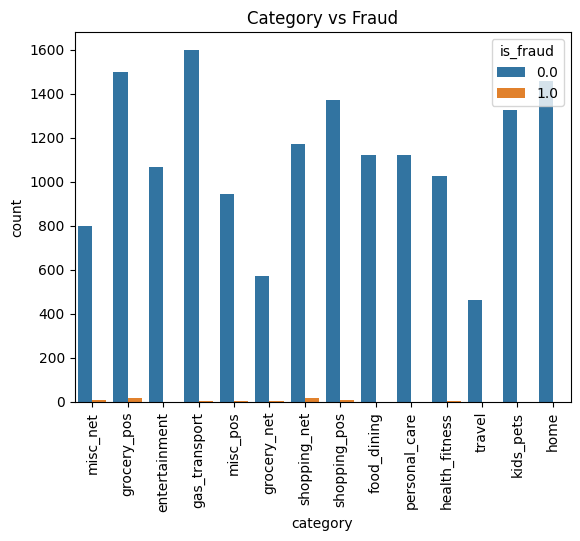

In [ ]:
sns.countplot(x='category', hue='is_fraud', data=fraud_data)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()

### **d. State vs Fraud**

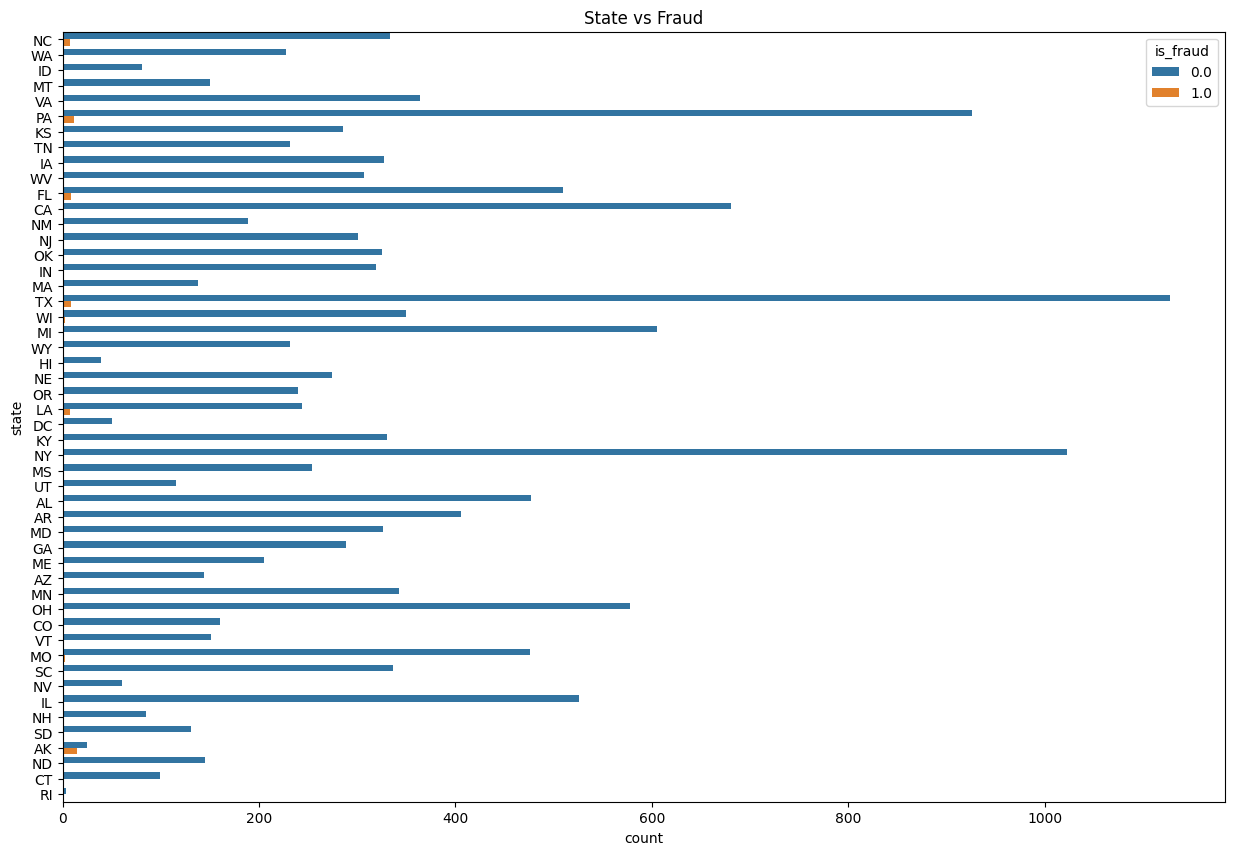

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y='state', hue='is_fraud', data=fraud_data)
plt.title("State vs Fraud")
plt.show()

### **e. Boxplot Age vs Fraud**

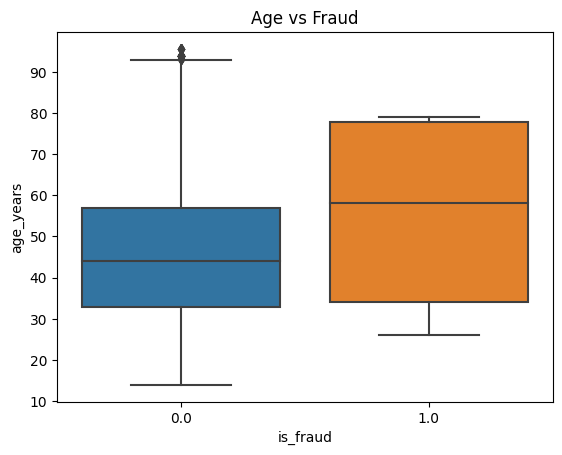

In [ ]:
sns.boxplot(y='age_years', x='is_fraud', data=fraud_data)
plt.title('Age vs Fraud')
plt.show()


# **E) Multivariate Analysis**

**a. Violinplot of Amount against fraud classification split by gender**

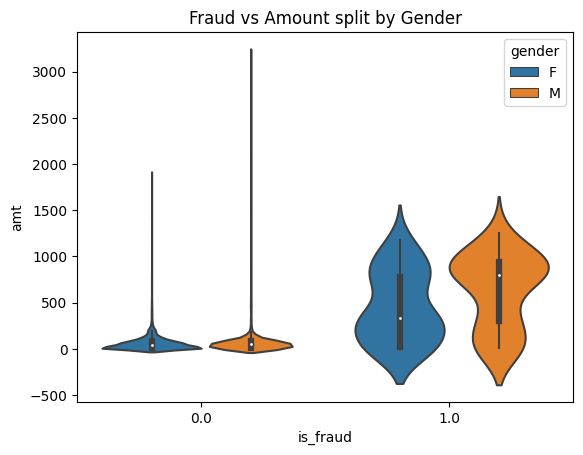

In [ ]:
sns.violinplot(x='is_fraud', y='amt', hue='gender', data=fraud_data)
plt.title('Fraud vs Amount split by Gender')
plt.show()

**b. Violinplot of Age against fraud classification split by gender**

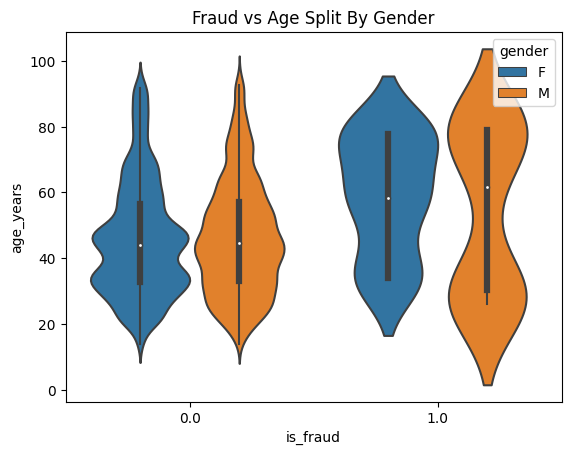

In [ ]:
sns.violinplot(x='is_fraud', y='age_years', hue='gender', data=fraud_data)
plt.title('Fraud vs Age Split By Gender')
plt.show()

**c. Scatterplot of Age vs Amount vs Fraud**

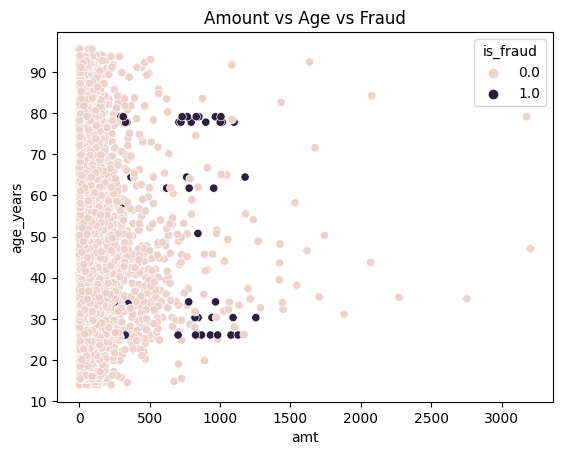

In [ ]:
sns.scatterplot(data=fraud_data, x='amt', y='age_years', hue='is_fraud')
plt.title('Amount vs Age vs Fraud')
plt.show()

# **Processing**

In [ ]:
processed_df = pd.get_dummies(
    data=fraud_data,
    columns=['state', 'gender'],
    drop_first=True
)

In [ ]:
processed_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,street,city,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,age_years,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,gender_M
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,Jennifer Banks,30.815144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,Stephanie Gill,40.531977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,Edward Sanchez,56.951205,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,Jeremy White,51.970953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,Tyler Garcia,32.764539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# **F)** **Correlation**

<Axes: >

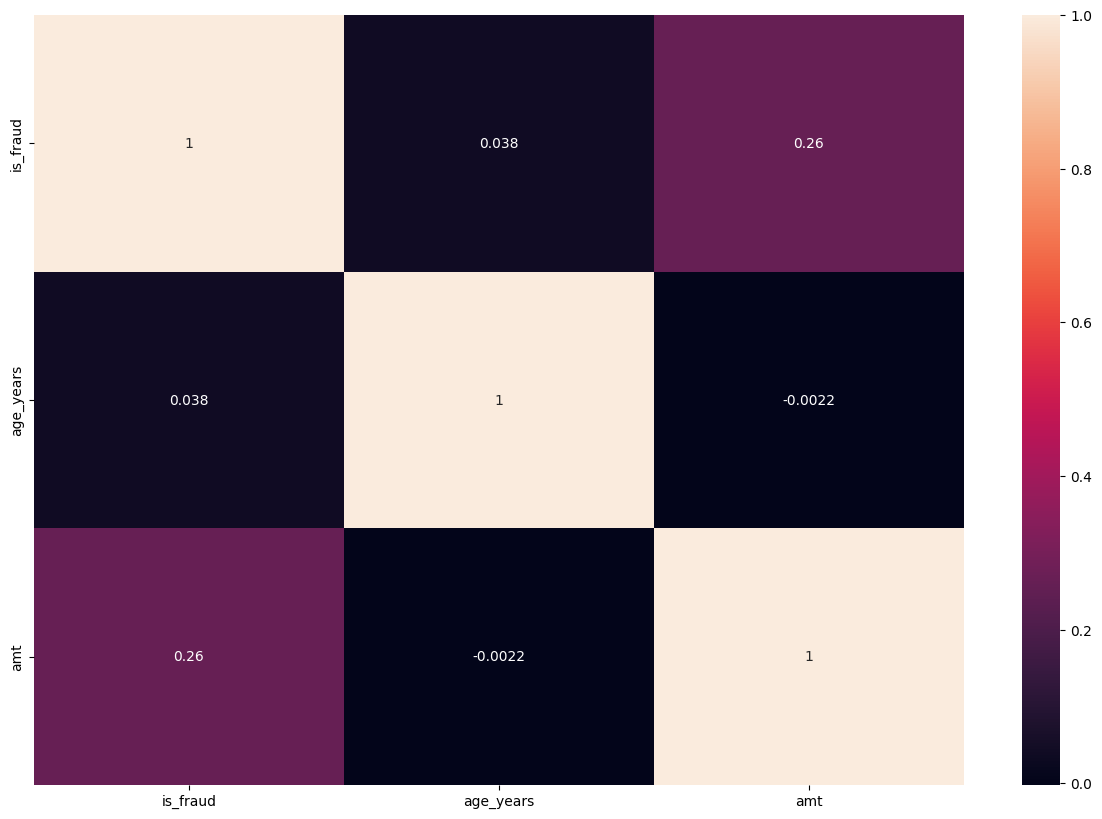

In [ ]:
correlation_matrix = fraud_data[['is_fraud', 'age_years', 'amt']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(data=correlation_matrix, annot=True)

# **Data Preparation**

In [ ]:
fraud_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,age_years
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,Jennifer Banks,30.815144
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,Stephanie Gill,40.531977
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,Edward Sanchez,56.951205


In [ ]:
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,name,age_years
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,Jennifer Banks,30.815144
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,Stephanie Gill,40.531977
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,Edward Sanchez,56.951205
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,Jeremy White,51.970953
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,Tyler Garcia,32.764539


# **Data Imbalance check**

In [ ]:
import plotly.express as px
fig = px.pie(values=fraud_data['is_fraud'].value_counts(), names=["Genuine","Fraud"] , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

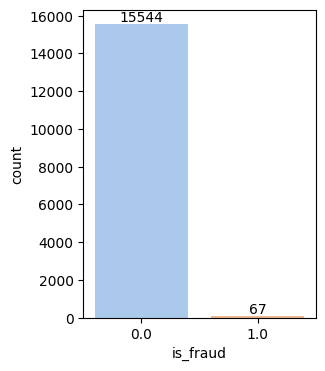

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=fraud_data,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
print('Genuine:', round(fraud_data['is_fraud'].value_counts()[0]/len(fraud_data) * 100,2), '% of the dataset')
print('Frauds:', round(fraud_data['is_fraud'].value_counts()[1]/len(fraud_data) * 100,2), '% of the dataset')

Genuine: 99.56 % of the dataset
Frauds: 0.43 % of the dataset


In this dataset:

we have 99.42% of Genuine transactions and only 0,58% (7506) of fraud transactions; which means that a blind guess (bet on Genuine) would give us accuracy of 99.42%.

# **Data Cleaning**

In [ ]:
fraud_train.info(),fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7815 entries, 0 to 7814
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7815 non-null   int64  
 1   trans_date_trans_time  7815 non-null   object 
 2   cc_num                 7815 non-null   int64  
 3   merchant               7815 non-null   object 
 4   category               7815 non-null   object 
 5   amt                    7815 non-null   float64
 6   first                  7815 non-null   object 
 7   last                   7815 non-null   object 
 8   gender                 7814 non-null   object 
 9   street                 7814 non-null   object 
 10  city                   7814 non-null   object 
 11  state                  7814 non-null   object 
 12  zip                    7814 non-null   float64
 13  lat                    7814 non-null   float64
 14  long                   7814 non-null   float64
 15  city

(None, None)

In [ ]:
fraud_train.isnull().sum(),fraud_test.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   1
 street                   1
 city                     1
 state                    1
 zip                      1
 lat                      1
 long                     1
 city_pop                 1
 job                      1
 dob                      1
 trans_num                1
 unix_time                1
 merch_lat                1
 merch_long               1
 is_fraud                 1
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

**1. Drop Column**

In [ ]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
fraud_train.drop(columns=drop_columns,inplace=True)
fraud_test.drop(columns=drop_columns,inplace=True)

In [ ]:
print(fraud_train.shape)
print(fraud_test.shape)

(7815, 14)
(7798, 14)


**2. Handle Date and Time**

In [ ]:
fraud_train['trans_date_trans_time']=pd.to_datetime(fraud_train['trans_date_trans_time'])
fraud_train['trans_date']=fraud_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_train['trans_date']=pd.to_datetime(fraud_train['trans_date'])
fraud_train['dob']=pd.to_datetime(fraud_train['dob'])

fraud_test['trans_date_trans_time']=pd.to_datetime(fraud_test['trans_date_trans_time'])
fraud_test['trans_date']=fraud_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_test['trans_date']=pd.to_datetime(fraud_test['trans_date'])
fraud_test['dob']=pd.to_datetime(fraud_test['dob'])

# **Data Preprocessing**

**1. Feature Engineering**

In [ ]:
#Calculate Age
fraud_train["age"] = fraud_train["trans_date"]-fraud_train["dob"]
fraud_train["age"]=fraud_train["age"].astype('timedelta64[Y]')

fraud_test["age"] = fraud_test["trans_date"]-fraud_test["dob"]
fraud_test["age"]=fraud_test["age"].astype('timedelta64[Y]')

In [ ]:
# Get Transaction Month & Year
fraud_train['trans_month'] = pd.DatetimeIndex(fraud_train['trans_date']).month
fraud_test['trans_year'] = pd.DatetimeIndex(fraud_test['trans_date']).year

In [ ]:
#Calculate distance between merchant and home location
fraud_train['latitudinal_distance'] = abs(round(fraud_train['merch_lat']-fraud_train['lat'],3))
fraud_train['longitudinal_distance'] = abs(round(fraud_train['merch_long']-fraud_train['long'],3))

fraud_test['latitudinal_distance'] = abs(round(fraud_test['merch_lat']-fraud_test['lat'],3))
fraud_test['longitudinal_distance'] = abs(round(fraud_test['merch_long']-fraud_test['long'],3))

In [ ]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
fraud_train.drop(columns=drop_columns,inplace=True)
fraud_test.drop(columns=drop_columns,inplace=True)

In [ ]:
# Convert categorical column gender into numerical
fraud_train.gender=fraud_train.gender.apply(lambda x: 1 if x=="M" else 0)
fraud_test.gender=fraud_test.gender.apply(lambda x: 1 if x=="M" else 0)

In [ ]:
#One Hot Encoding of Category column
fraud_train = pd.get_dummies(fraud_train, columns=['category'], prefix='category')
fraud_test = pd.get_dummies(fraud_test, columns=['category'], prefix='category')

fraud_test = fraud_test.reindex(columns=fraud_train.columns, fill_value=0)


In [ ]:
fraud_train.head()

,amt,gender,city_pop,is_fraud,age,trans_month,latitudinal_distance,longitudinal_distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495.0,0.0,30.0,1,0.068,0.870,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149.0,0.0,40.0,1,0.271,0.024,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154.0,0.0,56.0,1,0.970,0.108,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939.0,0.0,51.0,1,0.804,0.447,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99.0,0.0,32.0,1,0.254,0.830,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
fraud_test.head()

,amt,gender,city_pop,is_fraud,age,trans_month,latitudinal_distance,longitudinal_distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0.0,52.0,0,0.020,0.265,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0.0,30.0,0,0.870,0.476,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0.0,49.0,0,0.177,0.660,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0.0,32.0,0,0.243,0.064,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0.0,64.0,0,0.706,0.868,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
fraud_train = fraud_train.dropna()

In [ ]:
fraud_test = fraud_test.dropna()

**2. Split train and test data**

In [ ]:
X_train = fraud_train.drop('is_fraud', axis=1)
y_train = fraud_train['is_fraud']
X_test = fraud_test.drop('is_fraud', axis=1)
y_test = fraud_test['is_fraud']

**3. Handling data imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

**4. Standardize data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Step 2: Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model Building**

**1. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      7775
         1.0       0.00      0.00      0.00        22

    accuracy                           0.99      7797
   macro avg       0.50      0.50      0.50      7797
weighted avg       0.99      0.99      0.99      7797

Accuracy: 0.9920482236757727


**2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7775
         1.0       0.00      0.00      0.00        22

    accuracy                           1.00      7797
   macro avg       0.50      0.50      0.50      7797
weighted avg       0.99      1.00      1.00      7797

Accuracy: 0.9965371296652559


**3. XG Boost**

In [ ]:
#import necessary libraries
import xgboost as xgb

# Create an XGBoost classifier
clf = xgb.XGBClassifier(
    learning_rate=0.1,  # Learning rate (controls step size during training)
    n_estimators=100,   # Number of boosting rounds (trees)
    max_depth=3,        # Maximum tree depth
    objective='binary:logistic',  # Binary classification problem
    random_state=42
)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      7775
         1.0       0.05      0.18      0.08        22

    accuracy                           0.99      7797
   macro avg       0.53      0.59      0.54      7797
weighted avg       1.00      0.99      0.99      7797

Accuracy: 0.9884570988841862
